## Do Simple Linear regression in Pytorch

In [3]:
# imports
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
rng = np.random.default_rng()

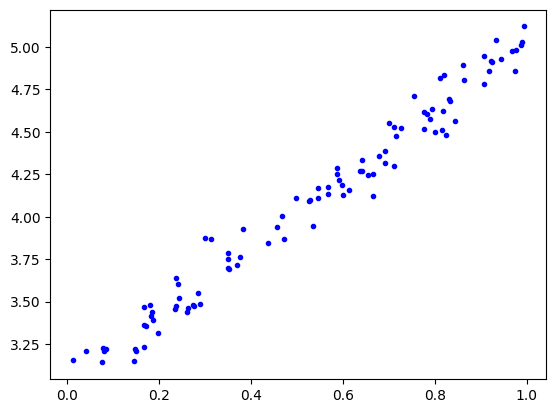

In [4]:
# Generate random data
X = np.random.rand(100, 1)
X_tensor = torch.tensor(X, dtype=torch.float32)
y = 2 * X + 3 + rng.standard_normal((100, 1))*0.1
y_tensor = torch.tensor(y, dtype=torch.float32)
plt.scatter(X, y, marker=".", color="blue")

In [16]:
# Define the model
model = nn.Linear(1, 1)
# Define the loss function
loss_fn = nn.MSELoss()
# Define the optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

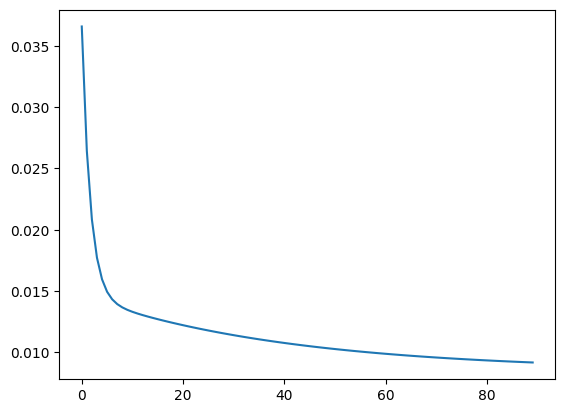

In [17]:
# Train the model
model.train()
losses = []
for epoch in range(100):
  optimizer.zero_grad()
  y_pred = model(X_tensor)
  loss = loss_fn(y_pred, y_tensor)
  losses.append(loss.item())
  loss.backward()
  optimizer.step()

plt.plot(losses[10:])
plt.show()

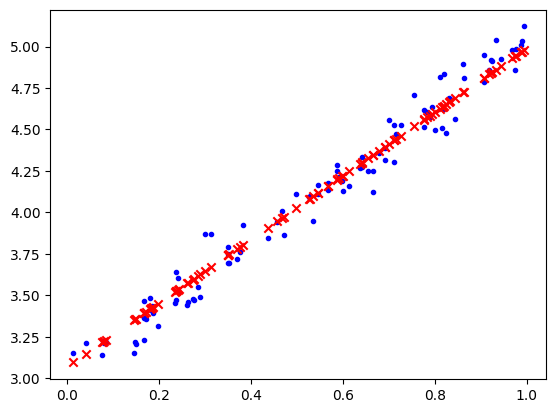

In [18]:
# Plot the data and the model
model.eval()
plt.scatter(X, y, marker=".", color="blue")
plt.scatter(X, model(X_tensor).detach().numpy(), marker="x", color="red")
plt.show()

## Create a model class

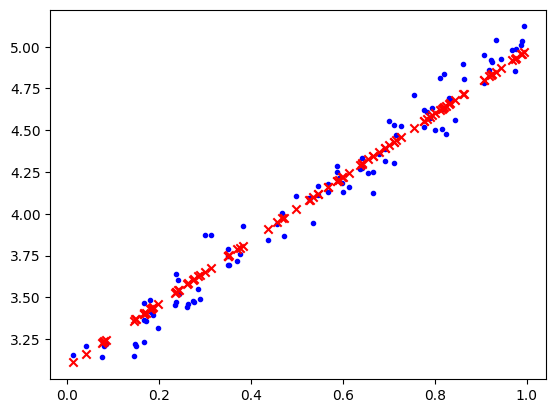

In [19]:
# Define custom model
class CustomLinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.w = nn.Parameter(torch.randn(1))
        self.b = nn.Parameter(torch.randn(1))

    def forward(self, x):
        return self.w*x + self.b

cust_model = CustomLinearRegression()

# Define the loss function
loss_fn = torch.nn.MSELoss()

# Define the optimizer
optimizer = torch.optim.SGD(cust_model.parameters(), lr=0.1)

# Train the model
cust_model.train()
for epoch in range(100):
  optimizer.zero_grad()
  y_pred = cust_model(X_tensor)
  loss = loss_fn(y_pred, y_tensor)
  loss.backward()
  optimizer.step()

# Plot the data and the model
cust_model.eval()
plt.scatter(X, y, marker=".", color="blue")
plt.scatter(X, cust_model(X_tensor).detach().numpy(), marker="x", color="red")
plt.show()